In [30]:
pip install jupyter numpy pandas matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset

In [20]:
data = load_iris()
X = data.data  # Features
y = data.target  # Labels
labels = data.target_names  # Class names


# Standardize the data

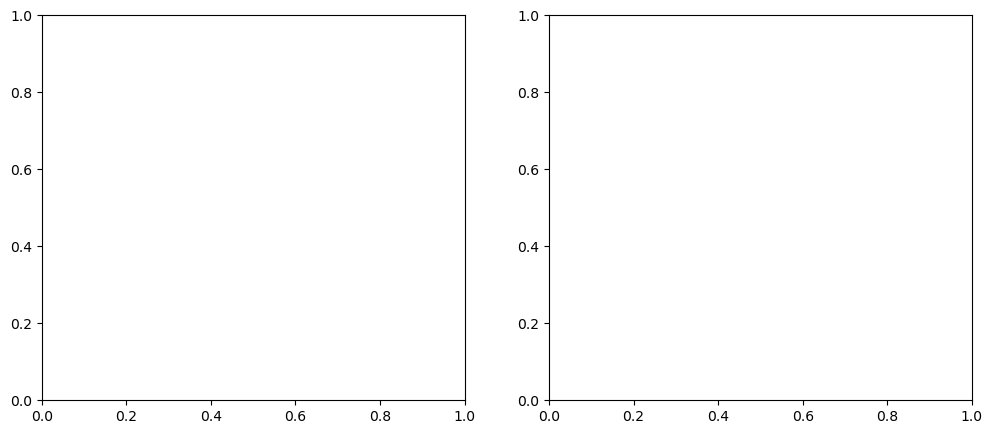

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply LDA (reduce to 2 components)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plot PCA and LDA results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA Plot

In [22]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", alpha=0.8, ax=axes[0])
axes[0].set_title("PCA Projection")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

Text(4.444444444444452, 0.5, 'Principal Component 2')

# LDA Plot

In [23]:
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="viridis", alpha=0.8, ax=axes[1])
axes[1].set_title("LDA Projection")
axes[1].set_xlabel("Linear Discriminant 1")
axes[1].set_ylabel("Linear Discriminant 2")

Text(511.7171717171717, 0.5, 'Linear Discriminant 2')

In [24]:
plt.show()

# MNIST dataset

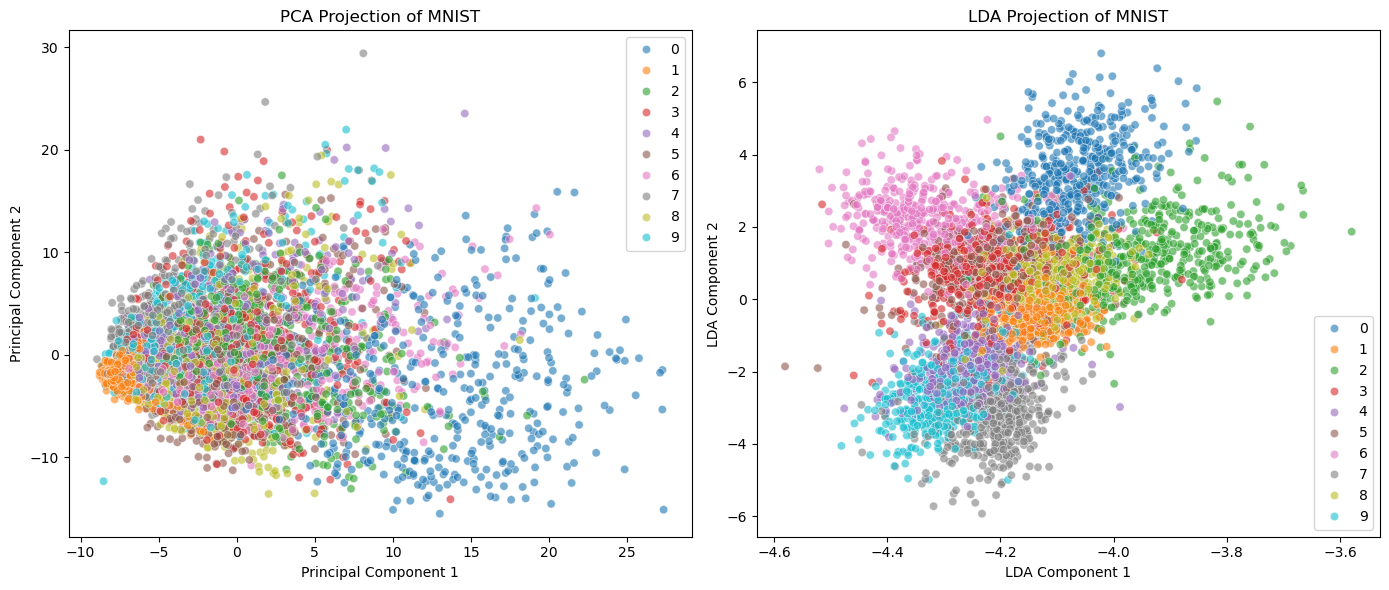

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to int

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce sample size (Optional: Faster Execution)
X_sample, _, y_sample, _ = train_test_split(X_scaled, y, train_size=5000, stratify=y, random_state=42)

# Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Apply LDA (LDA needs at least two classes)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_sample, y_sample)

# Plot PCA vs LDA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_sample, palette="tab10", alpha=0.6, ax=axes[0])
axes[0].set_title("PCA Projection of MNIST")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# LDA Plot
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_sample, palette="tab10", alpha=0.6, ax=axes[1])
axes[1].set_title("LDA Projection of MNIST")
axes[1].set_xlabel("LDA Component 1")
axes[1].set_ylabel("LDA Component 2")

plt.tight_layout()
plt.show()
